# Notebook 13
# 04/06/25
# EESC BC3050
## Matthew-David Ilomuanya

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
print (df_scripps.info())

## Question 1

In [18]:
# Loading in and cleaning data
file = 'daily_flask_co2_mlo.csv'
scripps = pd.read_csv(file, skiprows=76, header=None, usecols=[0,5,6])
scripps.columns=['Date', 'Flag', 'CO2']

# Turning it into a DateTime Index
scripps.Date=pd.to_datetime(scripps.Date)
scripps.set_index('Date', inplace=True)

# Cleaning the Flag data
clean_scripps = scripps[scripps['Flag'] == 0]

In [19]:
scripps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2656 entries, 1960-03-30 to 2025-02-11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Flag    2656 non-null   int64  
 1   CO2     2656 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 62.2 KB


## Question 2

/var/folders/fm/wqwsv4hx2fs6mhx28vlh_g600000gn/T/ipykernel_60540/1376514616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_scripps['CO2_Smooth'] = clean_scripps['CO2'].rolling(window=365, center=True).mean()
/var/folders/fm/wqwsv4hx2fs6mhx28vlh_g600000gn/T/ipykernel_60540/1376514616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_scripps['Difference'] = clean_scripps['CO2'] - clean_scripps['CO2_Smooth']
/var/folders/fm/wqwsv4hx2fs6mhx28vlh_g600000gn/T/ipykernel_60540/1376514616.py:8: Fu

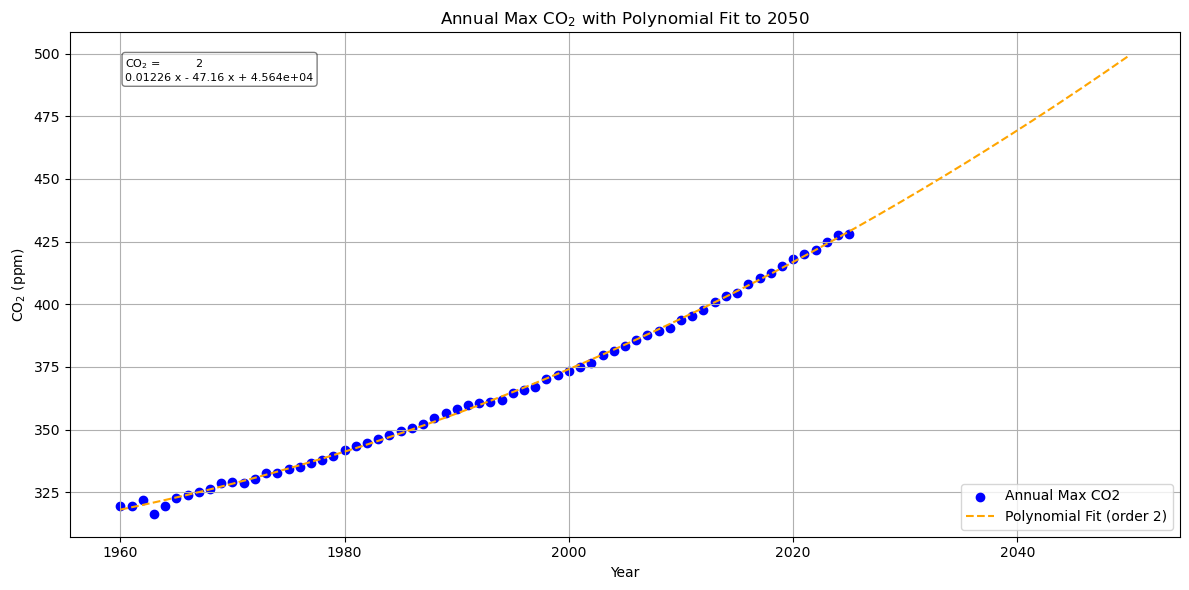

In [21]:
# Smoothed CO2 column using a rolling window (365-day rolling average)
clean_scripps['CO2_Smooth'] = clean_scripps['CO2'].rolling(window=365, center=True).mean()

# Calculate the difference between the actual and smoothed values (de-trending)
clean_scripps['Difference'] = clean_scripps['CO2'] - clean_scripps['CO2_Smooth']

# Resample annual maximum CO2 for both raw and smoothed
annual_max_co2 = clean_scripps['CO2'].resample('Y').max()
annual_max_smooth = clean_scripps['CO2_Smooth'].resample('Y').max()

# Prepare for polynomial fitting
x = annual_max_co2.index.year
y = annual_max_co2.values
fit_order = 2
a = np.polyfit(x, y, fit_order)
polynomial = np.poly1d(a)

# Predict out to 2050
x_fit = np.linspace(x.min(), 2050, 500)
y_fit = polynomial(x_fit)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.scatter(x, y, color='blue', marker='o', label='Annual Max CO2')
ax.plot(x_fit, y_fit, linestyle='--', color='orange', label='Polynomial Fit (order 2)')
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')
ax.set_title('Annual Max CO$_2$ with Polynomial Fit to 2050')
textstr = 'CO$_2$ = {}'.format(polynomial)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

**Figure 2.1: Annual Maximum CO₂ with Polynomial Projection to 2050**

This graph shows the annual maximum CO₂ concentrations measured at Mauna Loa from 1960 to 2025, along with a second-order polynomial fit projecting future values through the year 2050. The curve reflects the accelerating increase in atmospheric CO₂, capturing both the long-term trend and providing a forecast under the assumption of continued growth.

## Question 3

In [22]:
# Calculate 365-day rolling mean and subtract to get seasonal variation
clean_scripps['CO2_Smooth_365D'] = clean_scripps['CO2'].rolling('365D', center=True).mean()
clean_scripps['CO2_Seasonal_Diff'] = clean_scripps['CO2'] - clean_scripps['CO2_Smooth_365D']

/var/folders/fm/wqwsv4hx2fs6mhx28vlh_g600000gn/T/ipykernel_60540/3812212432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_scripps['CO2_Smooth_365D'] = clean_scripps['CO2'].rolling('365D', center=True).mean()
/var/folders/fm/wqwsv4hx2fs6mhx28vlh_g600000gn/T/ipykernel_60540/3812212432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_scripps['CO2_Seasonal_Diff'] = clean_scripps['CO2'] - clean_scripps['CO2_Smooth_365D']


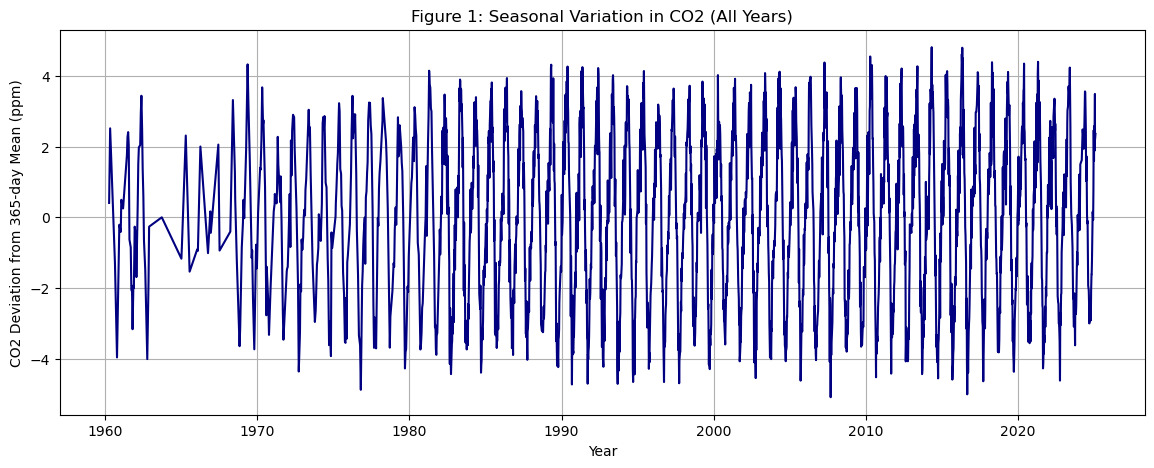

In [30]:
# Plot 1 - All years, seasonal difference
fig1, ax1 = plt.subplots(figsize=(14, 5))
ax1.plot(clean_scripps.index, clean_scripps['CO2_Seasonal_Diff'], color='navy')
ax1.set_title('Figure 1: Seasonal Variation in CO2 (All Years)')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Deviation from 365-day Mean (ppm)')
ax1.grid(True)
plt.show()

**Figure 3.1: Seasonal Variation in CO2 (All Years)**

This plot shows the difference between daily CO2 measurements and their 365-day rolling average from 1960 to 2025. It highlights the regular seasonal cycle of CO2, with peaks in spring and declines during the growing season in the Northern Hemisphere.

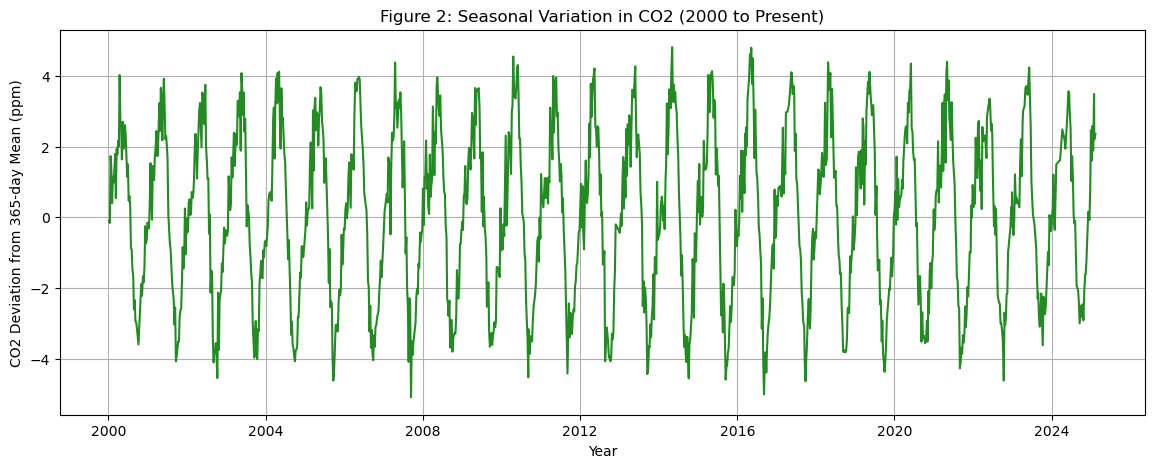

In [29]:
# Plot 2 - Seasonal difference from 2000 to present
recent = clean_scripps.loc[clean_scripps.index >= '2000-01-01']
fig2, ax2 = plt.subplots(figsize=(14, 5))
ax2.plot(recent.index, recent['CO2_Seasonal_Diff'], color='forestgreen')
ax2.set_title('Figure 2: Seasonal Variation in CO2 (2000 to Present)')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Deviation from 365-day Mean (ppm)')
ax2.grid(True)
plt.show()

**Figure 3.2: Seasonal Variation in CO2 (2000 to Present)**

Focusing on data from 2000 onward, this plot reveals the persistence of seasonal CO2 fluctuations and allows for closer inspection of whether the amplitude or timing of the cycle has shifted in recent decades.

/var/folders/fm/wqwsv4hx2fs6mhx28vlh_g600000gn/T/ipykernel_60540/3056646855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_scripps['Month'] = clean_scripps.index.month


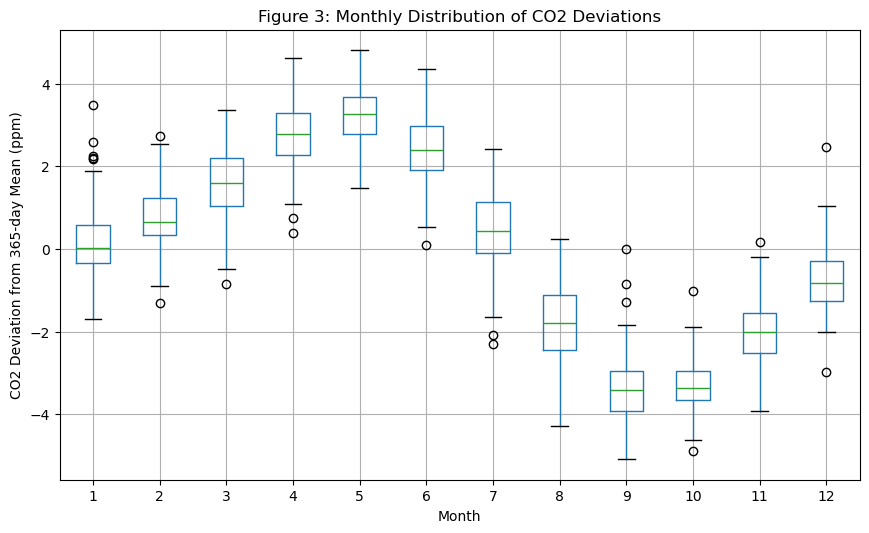

In [28]:
# Plot 3 - Boxplot by month
clean_scripps['Month'] = clean_scripps.index.month
fig3, ax3 = plt.subplots(figsize=(10, 6))
clean_scripps.boxplot(column='CO2_Seasonal_Diff', by='Month', ax=ax3)
ax3.set_title('Figure 3: Monthly Distribution of CO2 Deviations')
ax3.set_xlabel('Month')
ax3.set_ylabel('CO2 Deviation from 365-day Mean (ppm)')
plt.suptitle("")  # Remove default boxplot title
plt.show()

**Figure 3.3: Monthly Distribution of CO2 Deviations**

This boxplot displays the distribution of CO2 deviations by month, showing that CO2 levels typically peak in May and are lowest between August and October, reflecting the impact of vegetation growth cycles on atmospheric carbon dioxide.